<a href="https://colab.research.google.com/github/tkd8973/Data_Visualization/blob/main/visualization_sw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
from google.colab import files

df = pd.read_excel('KDX2021_SSC_ONLINE_DATA.xlsx')
df2 = df.copy()
df

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101
...,...,...,...,...,...,...,...,...
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107
21554,202105,스포츠의류용품,평일,화,E.18-22시,M,B.3O대,603
21555,202105,인테리어,평일,화,C.10-14시,F,E.60대이상,415


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
exit()

In [2]:
df2

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101
...,...,...,...,...,...,...,...,...
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107
21554,202105,스포츠의류용품,평일,화,E.18-22시,M,B.3O대,603
21555,202105,인테리어,평일,화,C.10-14시,F,E.60대이상,415


전처리
* column명을 재설정 해준다
* 위험하지만 총합 건수가 1000미만인 행 DROP
* Age : 20-60 으로 mapping 해주고, 20~30대만 사용함으로 추출
* 성별/나이로 새로운 열 생성

In [ ]:
df2.columns = ['Year_Month','Tag','weekday','day','time','sex','age','sum']
df2 = df2[df2['sum']>1000]
df2.sort_values(by=['age','time'],inplace=True)
ages = df2.age.unique()

df2['age']=df2['age'].apply(lambda x:[int(((i+1)*10)+10) for i,v in enumerate(ages) if x==v][0])
datas = df2[(df2['age']==20) | (df2['age']==30)]


In [113]:
datas

,Year_Month,Tag,weekday,day,time,sex,age,sum
141,202005,패션,평일,목,A.02-06시,F,20,1225
385,202105,패션,평일,금,A.02-06시,F,20,1168
554,202105,패션,평일,목,A.02-06시,F,20,1515
2384,202105,패션,휴일,토,A.02-06시,F,20,1331
3142,202005,패션,휴일,토,A.02-06시,F,20,1236
...,...,...,...,...,...,...,...,...
21346,202005,유아용품,휴일,토,F.22-02시,F,30,2243
21386,202005,인테리어,평일,수,F.22-02시,F,30,2485
21474,202105,유아용품,휴일,수,F.22-02시,F,30,1205
21507,202005,화장품,평일,월,F.22-02시,M,30,1478


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5345 entries, 9040 to 12302
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year_Month  5345 non-null   int64 
 1   Tag         5345 non-null   object
 2   weekday     5345 non-null   object
 3   day         5345 non-null   object
 4   time        5345 non-null   object
 5   sex         5345 non-null   object
 6   age         5345 non-null   int64 
 7   sum         5345 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 375.8+ KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [172]:
plt.rc('font', family='NanumBarunGothic') 

* 데이터의 조작 전, 시각화를 통해 의미있는 데이터와 없는 데이터를 골라내어 필터링

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


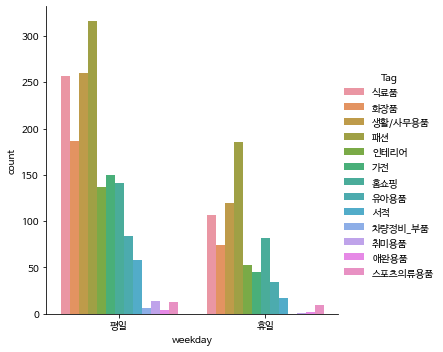

In [86]:
sns.catplot('weekday',kind='count',hue='Tag',data=datas) # 평일/공휴일에 따른 구매목록 개수

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


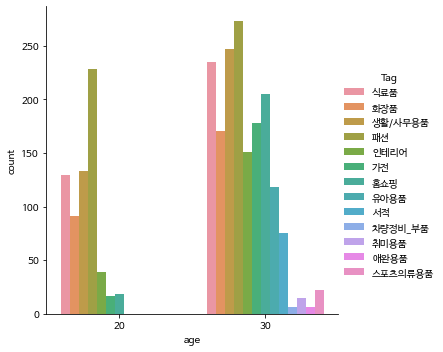

In [87]:
sns.catplot('age',kind='count',hue='Tag',data=datas)  # 나이에 따른 구매목록 개수
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


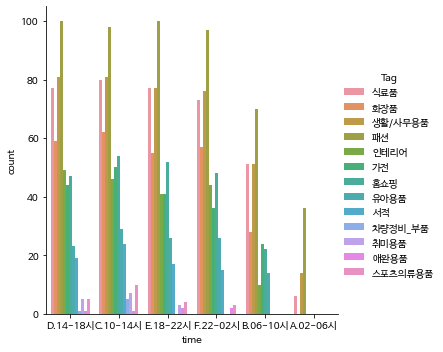

In [88]:
sns.catplot('time',kind='count',hue='Tag',data=datas)  # 시간에 따른 구매목록 개수

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


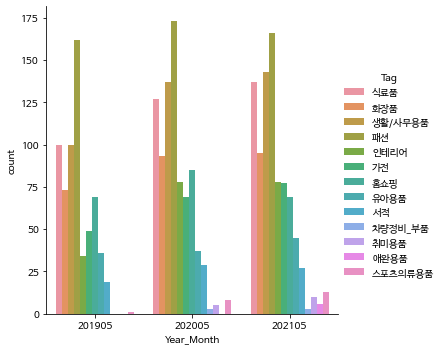

In [89]:
sns.catplot('Year_Month',kind='count',hue='Tag',data=datas)

* 낮은 비율을 찾이하는 차량장비, 취미용품, 애완용품,스포츠 의류 Drop

In [114]:
datas['Tag'].unique()[:9]

array(['패션', '생활/사무용품', '식료품', '화장품', '가전', '인테리어', '홈쇼핑', '유아용품', '서적'],
      dtype=object)

<AxesSubplot:xlabel='time', ylabel='sum'>

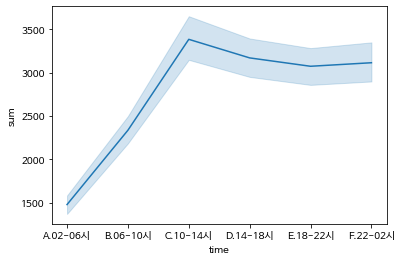

In [115]:
sns.lineplot(x='time',y='sum',data=datas)    # 02~06시에는 건수가 적음으로 드랍

In [169]:
aa=datas['time'].unique()[0]
datas= datas[datas['time']!=datas['time'].unique()[0]]

In [170]:
YM = np.sort(datas['Year_Month'].unique())
tags = datas['Tag'].unique()[:9]

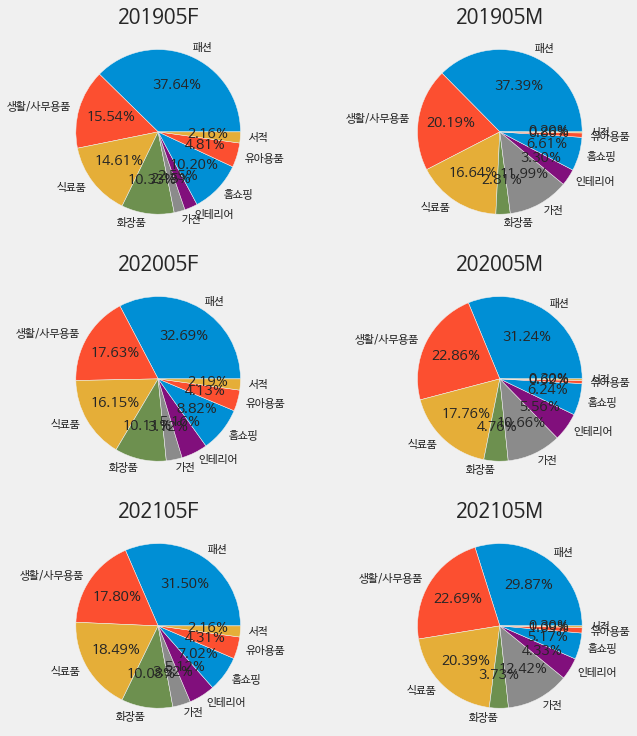

In [173]:
def prod(YM,tag,sex):
    total=datas.loc[(datas['Year_Month'] == YM) & (datas['sex']==sex)]
    return (total.loc[total['Tag']==tag]['sum'].sum() / total['sum'].sum())*100

def Pieplot(ym,cnt,tags,data,sex):
    plt.subplot(3,2,cnt)
    plt.title(str(ym)+sex)
    plt.pie(data,labels=tags,
            autopct='%1.2f%%')

Female = []
Man = []
cnt=0

plt.figure(figsize=(10,12))
plt.tight_layout()

for i in YM:
    cnt+=1
    for j in tags:
        Female.append(prod(i,j,'F'))
        Man.append(prod(i,j,'M'))
    Pieplot(i,cnt,tags,Female,'F')
    cnt+=1    
    Pieplot(i,cnt,tags,Man,'M')
    Female=[]
    Man=[]

plt.show()